<a href="https://colab.research.google.com/github/jonh14lk/Premier_League_DS/blob/master/PL_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importando as bibliotecas que serao utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [570]:
#importando todos os arquivos e concatenandos eles

data1 = pd.read_csv("season-1819.csv")
data2 = pd.read_csv("season-1718.csv")
data3 = pd.read_csv("season-1617.csv")
data4 = pd.read_csv("season-1516.csv")
data5 = pd.read_csv("season-1415.csv")
data6 = pd.read_csv("season-1314.csv")
data7 = pd.read_csv("season-1213.csv")
data8 = pd.read_csv("season-1112.csv")
data9 = pd.read_csv("season-1011.csv")
data10 = pd.read_csv("season-0910.csv")

data11 = pd.merge(data1 , data2 , how = "outer")
data12 = pd.merge(data3 , data11 , how = "outer")
data13 = pd.merge(data4 , data12 , how = "outer")
data14 = pd.merge(data5 , data13, how = "outer")
data15 = pd.merge(data6 , data14 , how = "outer")
data16 = pd.merge(data7 , data15 , how = "outer")
data17 = pd.merge(data8 , data16 , how = "outer")
data18 = pd.merge(data9 , data17 , how = "outer")
data = pd.merge(data10 , data18 , how = "outer")

data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,SBH,SBD,SBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,BSH,BSD,BSA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSH,PSD,PSA,PSCH,PSCD,PSCA
0,E0,2009-08-15,Aston Villa,Wigan,0.0,2.0,A,0.0,1.0,A,M Clattenburg,11.0,14.0,5.0,7.0,15.0,14.0,4.0,6.0,2.0,2.0,0.0,0.0,1.67,3.60,5.50,1.65,3.40,5.00,1.67,3.50,5.25,1.7,3.5,4.90,1.67,3.3,4.50,1.65,3.40,5.0,1.70,3.40,5.50,1.67,3.60,5.50,1.70,3.40,5.00,1.62,3.5,5.5,37.0,1.72,1.66,3.77,3.51,6.05,5.33,32.0,2.04,1.92,1.91,1.81,21.0,0.00,1.28,1.22,4.40,3.99,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,2009-08-15,Blackburn,Man City,0.0,2.0,A,0.0,1.0,A,M Dean,17.0,8.0,9.0,5.0,12.0,9.0,5.0,4.0,2.0,1.0,0.0,0.0,3.60,3.25,2.10,3.40,3.15,2.00,3.40,3.25,2.10,3.2,3.2,2.20,3.00,3.2,2.10,3.15,3.25,2.1,3.50,3.20,2.15,3.30,3.25,2.20,3.25,3.20,2.20,3.30,3.2,2.2,38.0,3.78,3.37,3.35,3.24,2.25,2.12,33.0,2.15,2.04,1.78,1.71,24.0,0.00,2.58,2.38,1.60,1.54,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,2009-08-15,Bolton,Sunderland,0.0,1.0,A,0.0,1.0,A,A Marriner,11.0,20.0,3.0,13.0,16.0,10.0,4.0,7.0,2.0,1.0,0.0,0.0,2.25,3.25,3.25,2.15,3.15,3.15,2.25,3.25,3.10,2.2,3.2,3.20,2.10,3.2,3.00,2.25,3.20,2.9,2.30,3.20,3.20,2.30,3.25,3.10,2.25,3.20,3.10,2.20,3.2,3.3,38.0,2.37,2.24,3.31,3.20,3.40,3.15,33.0,2.25,2.12,1.70,1.66,23.0,0.00,1.68,1.61,2.33,2.23,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,2009-08-15,Chelsea,Hull,2.0,1.0,H,1.0,1.0,D,A Wiley,26.0,7.0,12.0,3.0,13.0,15.0,12.0,4.0,1.0,2.0,0.0,0.0,1.17,6.50,21.00,1.17,6.00,13.00,1.20,6.00,15.00,1.2,5.5,14.00,1.17,5.5,12.00,1.17,5.75,15.0,1.17,6.50,21.00,1.18,6.50,17.00,1.17,6.00,17.00,1.20,5.5,19.0,38.0,1.20,1.17,7.71,6.26,23.14,16.39,34.0,1.67,1.58,2.44,2.26,22.0,0.00,1.03,1.02,17.05,12.96,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,2009-08-15,Everton,Arsenal,1.0,6.0,A,0.0,3.0,A,M Halsey,8.0,15.0,5.0,9.0,11.0,13.0,4.0,9.0,0.0,0.0,0.0,0.0,3.20,3.25,2.30,2.95,3.15,2.25,3.00,3.25,2.30,3.1,3.1,2.30,2.88,3.0,2.25,3.00,3.20,2.2,3.20,3.20,2.30,3.25,3.25,2.25,2.90,3.30,2.30,3.25,3.2,2.2,38.0,3.34,3.07,3.34,3.21,2.42,2.28,34.0,2.20,2.06,1.77,1.70,24.0,0.00,2.27,2.20,1.73,1.63,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,E0,13/05/18,Newcastle,Chelsea,3.0,0.0,H,1.0,0.0,H,M Atkinson,16.0,6.0,6.0,2.0,11.0,10.0,4.0,2.0,0.0,1.0,0.0,0.0,6.50,4.20,1.60,6.50,4.10,1.53,NaN,NaN,NaN,4.5,4.0,1.70,5.50,3.9,1.60,NaN,NaN,NaN,6.50,4.00,1.57,NaN,NaN,NaN,6.00,4.20,1.60,NaN,NaN,NaN,41.0,6.60,5.83,4.40,4.05,1.70,1.59,40.0,1.85,1.80,2.09,2.01,21.0,1.00,1.90,1.83,2.11,2.03,5.96,4.22,1.61,4.85,3.72,1.80
3797,E0,13/05/18,Southampton,Man City,0.0,1.0,A,0.0,0.0,D,A Marriner,8.0,13.0,3.0,2.0,8.0,10.0,1.0,12.0,3.0,1.0,0.0,0.0,9.00,5.00,1.39,7.25,4.75,1.42,NaN,NaN,NaN,7.2,4.4,1.45,7.00,4.6,1.40,NaN,NaN,NaN,8.50,4.50,1.40,NaN,NaN,NaN,7.50,5.00,1.44,NaN,NaN,NaN,41.0,9.00,7.39,5.15,4.82,1.46,1.42,36.0,1.57,1.52,2.67,2.49,20.0,1.25,2.01,1.95,1.97,1.91,8.06,5.11,1.42,6.32,4.78,1.51
3798,E0,13/05/18,Swansea,Stoke,1.0,2.0,A,1.0,2.0,A,A Taylor,26.0,8.0,11.0,5.0,12.0,9.0,6.0,0.0,1.0,2.0,0.0,0.0,1.90,3.79,4.20,1.83,3.75,4.25,NaN,NaN,NaN,1.9,3.5,4.10,1.87,3.6,4.00,NaN,NaN,NaN,1.91,3.75,4.00,NaN,NaN,NaN,1.90,3.75,4.20,NaN,NaN,NaN,41.0,1.98,1.89,3.90,3.67,4.35,4.08,38.0,1.85,1.76,2.15,2.06,19.0,-0.50,1.94,1.88,2.03,1.98,1.91,3.72,4.29,2.08,3.56,3.82
3799,E0,13/05/18,Tottenham,Leicester,5.0,4.0,H,1.0,2.0,A,C Pawson,14.0,16.0,6.0,9.0,9.0,13.0,4.0,4.0,1.0,2.0,0.0,0.0,1.33,6.00,9.00,1.30,5.75,9.25,NaN,NaN,NaN,1.3,5.5,9.50,1.30,5.5,9.50,NaN,NaN,NaN,1.30,6.00,9.00,NaN,NaN,NaN,1.33,5.75,9.50,NaN,NaN,NaN,41.0,1.35,1.31,6.25,5.74,10.50,9.13,35.0,1.47,1.41,3.02,2.84,20.0

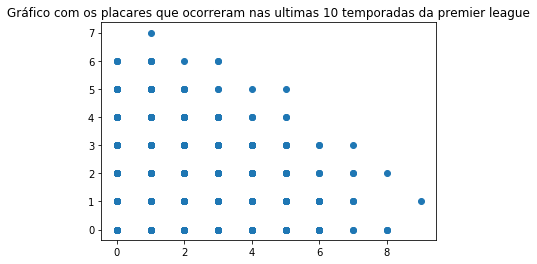

In [525]:
#separando os placares de cada jogo e plotando o gráfico
y1 = data['FTHG'] # gols feito pelo time da casa
r1 = data['FTAG'] # gols feito pelo time de fora
plt.scatter(y1 , r1)
plt.title("Gráfico com os placares que ocorreram nas ultimas 10 temporadas da premier league")
plt.show()

In [584]:
# pegando apenas as colunas que quero 
# tambem tenho que tratar o formato do FTR e do HTR que tá como caractere

data['FTR'] = data['FTR'].replace('H' , 0)
data['FTR'] = data['FTR'].replace('A' , 1)
data['FTR'] = data['FTR'].replace('D' , 2)

data['HTR'] = data['HTR'].replace('H' , 0)
data['HTR'] = data['HTR'].replace('A' , 1)
data['HTR'] = data['HTR'].replace('D' , 2)

xf = data['FTHG']
yf = data['FTAG']
zf = data['FTR']
xh = data['HTHG']
yh = data['HTAG']
zh = data['HTR']

data = pd.concat([xf , yf], axis = 1)
data = pd.concat([data , zf], axis = 1)
data = pd.concat([data , xh], axis = 1)
data = pd.concat([data , yh], axis = 1)
data = pd.concat([data , zh], axis = 1)
data = data.fillna(0) # tratando os NaN

data['FTHG'] = data['FTHG'].values.astype(np.int64) # convertendo todos os valores para inteiros
data['FTAG'] = data['FTAG'].values.astype(np.int64)
data['FTR'] = data['FTR'].values.astype(np.int64)
data['HTHG'] = data['HTHG'].values.astype(np.int64)
data['HTAG'] = data['HTAG'].values.astype(np.int64)
data['HTR'] = data['HTR'].values.astype(np.int64)

data

,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,0,2,1,0,1,1
1,0,2,1,0,1,1
2,0,1,1,0,1,1
3,2,1,0,1,1,2
4,1,6,1,0,3,1
...,...,...,...,...,...,...
3796,3,0,0,1,0,0
3797,0,1,1,0,0,2
3798,1,2,1,1,2,1
3799,5,4,0,1,2,1


In [0]:
# separando os a coluna que contem os ganhadores das partidas dos outros dados
y3 = data[['FTR']]
r3 = data.drop('FTR' , axis = 1)

In [586]:
# separando as amostras para treino(30%) e teste(70%)
r3_treino , r3_teste , y3_treino , y3_teste = train_test_split(r3 , y3 , test_size = 0.25 , random_state = 40)
y3_teste[300:305]

,FTR
80,1
2862,0
3062,2
290,0
361,2


In [587]:
# treinando o modelo usando o DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(r3_treino , y3_treino)
acuracia = model.score(r3_teste , y3_teste)
acuracia

0.9869941158973342

In [588]:
# agora com o modelo treinado
# dado qual era o resultado da partida ao final do primeiro tempo e quem era o vencedor ate entao
# e dado qual foi o resultado da partida final
# o modelo tenta predizer quem foi o ganhador da partida

previsoes = model.predict(r3_teste[300:305]) #nesse caso pegando o intervalo 1:4 da amostra de teste
previsoes

array([1., 0., 2., 0., 2.])